# 📊 Bank Marketing Data Analysis – EDA and Visualization
This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit (see variable `y`). 

Not sure where to begin? Scroll to the bottom to find challenges!

1️⃣ Project Setup

In [134]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


2️⃣ Data Import

In [1]:
import pandas as pd
df = pd.read_csv("bank-marketing.csv", sep=";")
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


3️⃣ Initial Data Overview

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [137]:
# Check unique values for 'contact', 'job', 'campaign', and 'pdays'
unique_contact = df['contact'].unique()
unique_job = df['job'].unique()
unique_campaign = df['campaign'].unique()
unique_pdays = df['pdays'].unique()
unique_y = df['y'].unique()

from IPython.display import display
print("Unique values in 'contact':")
display(unique_contact)
print("\nUnique values in 'job':")
display(unique_job)
print("\nUnique values in 'campaign':")
display(unique_campaign)
print("\nUnique values in 'pdays':")
display(unique_pdays)
print("\nUnique values in 'y':")
display(unique_y)


Unique values in 'contact':


array(['telephone', 'cellular'], dtype=object)


Unique values in 'job':


array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)


Unique values in 'campaign':


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])


Unique values in 'pdays':


array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])


Unique values in 'y':


array(['no', 'yes'], dtype=object)

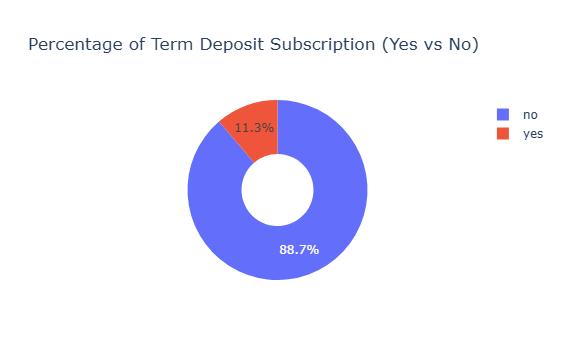

In [138]:
# Calculate the percentage of 'yes' vs 'no' in the 'y' column
yes_no_counts_display = yes_no_counts.rename({True: 'yes', False: 'no'})
import plotly.graph_objects as go
from IPython.display import display

fig = go.Figure(data=[
    go.Pie(labels=yes_no_counts_display.index, values=yes_no_counts_display.values, hole=0.4)
])
fig.update_layout(title_text='Percentage of Term Deposit Subscription (Yes vs No)')
fig.show()


## Data Segmentation Framework

### 1. Customer Profile
Defines **who the customer is**.
- **Age Group:** Young / Mid / Senior  
- **Job Group:** Professional, Service / Blue Collar, Student / Retired, Unemployed, Unknown  
- **Education Group:** Low / Medium / High / Unknown  
- **Financial Risk:** Low Risk / Medium Risk (based on default, loan, housing)

---

### 2. Contact Channel & Campaign Intensity
Defines **how and how often the customer was contacted**.
- **Contact Type:** Cellular vs Telephone  
- **Campaign Intensity:**  
  - 0–10 (Optimal)  
  - 10–20 (Declining effectiveness)  
  - 20–30 (Very low return)  
  - 30+ (Over-contacting)

---

### 3. Previous Campaign History
Defines **customer memory and past behavior**.
- **Previous Contacts Count**
- **Previous Campaign Outcome:** Success / Failure / Nonexistent  
- **Previously Contacted vs Never Contacted**

---

### 4. Economic / External (Market Conditions)
Defines **economic context at decision time**.

- **Employment Growth (emp.var.rate):**  
  Low / Medium / High (Counter-cyclical behavior)

- **Consumer Price Index (CPI):**  
  Low / Medium / High (Non-linear response)

- **Consumer Confidence Index:**  
  Low / Medium / High (Strong positive driver)

- **Interest Rate (euribor3m):**  
  Low / Medium / High (Strong negative driver)

- **Employment Level (nr.employed):**  
  Low / Medium / High (Urgency vs stability signal)

---


# Customer Profile Segmentation

Group Creation

In [139]:
# 1️⃣ Age Groups
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 55, 100],
    labels=['Young', 'Mid', 'Senior']
)

# 2️⃣ Job Groups
job_map = {
    'management': 'Professional',
    'admin.': 'Professional',
    'technician': 'Professional',
    'entrepreneur': 'Professional',
    'self-employed': 'Professional',

    'services': 'Service / Blue Collar',
    'blue-collar': 'Service / Blue Collar',
    'housemaid': 'Service / Blue Collar',

    'student': 'Student / Retired',
    'retired': 'Student / Retired',

    'unemployed': 'Unemployed',
    'unknown': 'Unknown'
}

df['job_group'] = df['job'].map(job_map)

# 3️⃣ Education Groups
edu_map = {
    'illiterate': 'Low',
    'basic.4y': 'Low',
    'basic.6y': 'Low',

    'basic.9y': 'Medium',
    'high.school': 'Medium',

    'professional.course': 'High',
    'university.degree': 'High',

    'unknown': 'Unknown'
}

df['education_group'] = df['education'].map(edu_map)

# 4️⃣ Financial Risk Group (Composite)
def risk_bucket(row):
    if row['default'] == 'yes':
        return 'High Risk'
    elif (row['loan'] == 'yes') or (row['housing'] == 'yes'):
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['financial_risk'] = df.apply(risk_bucket, axis=1)


In [140]:
df[['age_group', 'job_group', 'education_group', 'financial_risk']].value_counts().head()


age_group  job_group              education_group  financial_risk
Mid        Professional           High             Medium Risk       6982
                                                   Low Risk          4649
           Service / Blue Collar  Medium           Medium Risk       3360
           Professional           Medium           Medium Risk       2810
           Service / Blue Collar  Medium           Low Risk          2451
Name: count, dtype: int64



Subscription in numeric

In [145]:
df['y_bin'] = df['y'].map({'yes': 1, 'no': 0})


Group — Subscription Rate 

In [146]:
import pandas as pd

# 1️⃣ Ensure target is numeric
df['y_bin'] = (df['y'] == 'yes').astype(int)

# 3️⃣ Create summary function
def group_summary(df, group_col):
    return (
        df.groupby(group_col)
          .agg(
              customers=('y_bin','count'),
              subscriptions=('y_bin','sum'),
              subscription_rate=('y_bin','mean'),
              avg_contacts=('campaign','mean')
          )
          .sort_values('subscription_rate', ascending=False)
    )

# 4️⃣ Generate all summaries
summary_tables = {}
for col in ['age_group','job_group','education_group','financial_risk']:
    summary_tables[col] = group_summary(df, col)

# 5️⃣ Display (example: Age Group)
print("=== Age Group ===")
print(summary_tables['age_group'])

print("\n=== Job Group ===")
print(summary_tables['job_group'])

print("\n=== Education Group ===")
print(summary_tables['education_group'])

print("\n=== Financial Risk ===")
print(summary_tables['financial_risk'])


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\2323090522.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



=== Age Group ===
           customers  subscriptions  subscription_rate  avg_contacts
age_group                                                           
Senior          3582            741           0.206868      2.520101
Young           7383           1124           0.152242      2.528511
Mid            30223           2775           0.091817      2.582768

=== Job Group ===
                       customers  subscriptions  subscription_rate  \
job_group                                                            
Student / Retired           2595            709           0.273218   
Unemployed                  1014            144           0.142012   
Professional               22966           2683           0.116825   
Unknown                      330             37           0.112121   
Service / Blue Collar      14283           1067           0.074704   

                       avg_contacts  
job_group                            
Student / Retired          2.351060  
Unemployed   

Customer Profile visualization

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




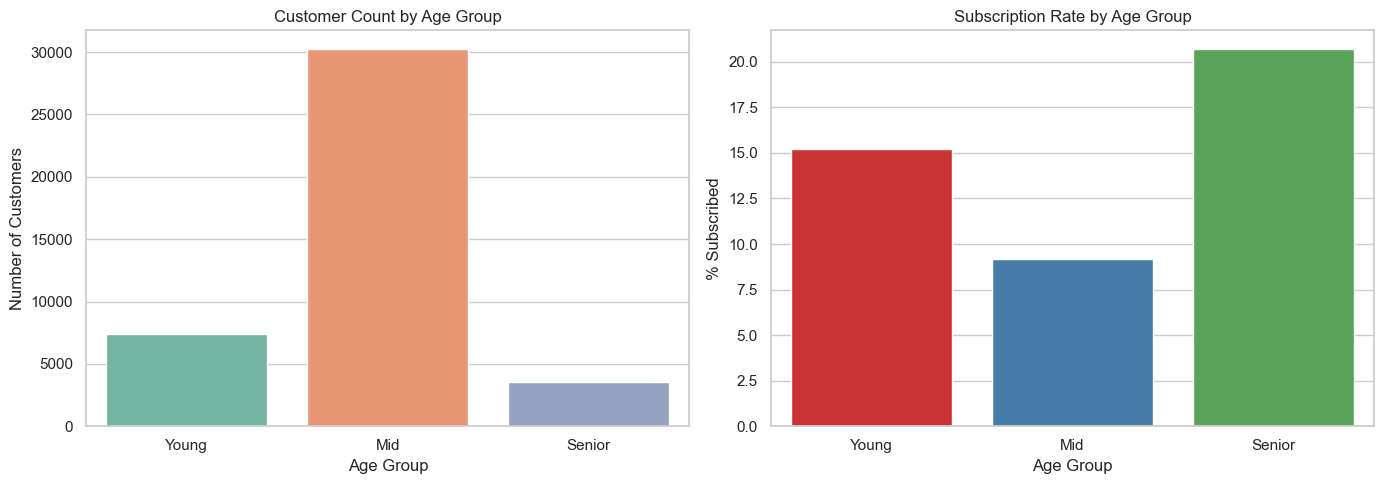

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:35: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




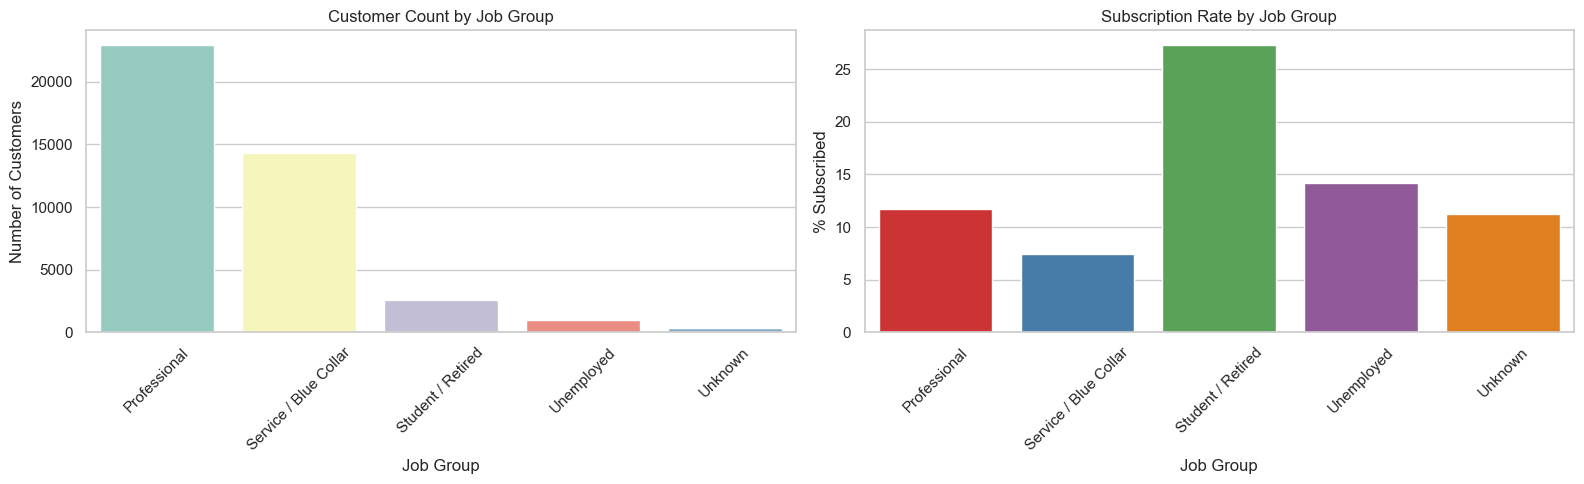

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




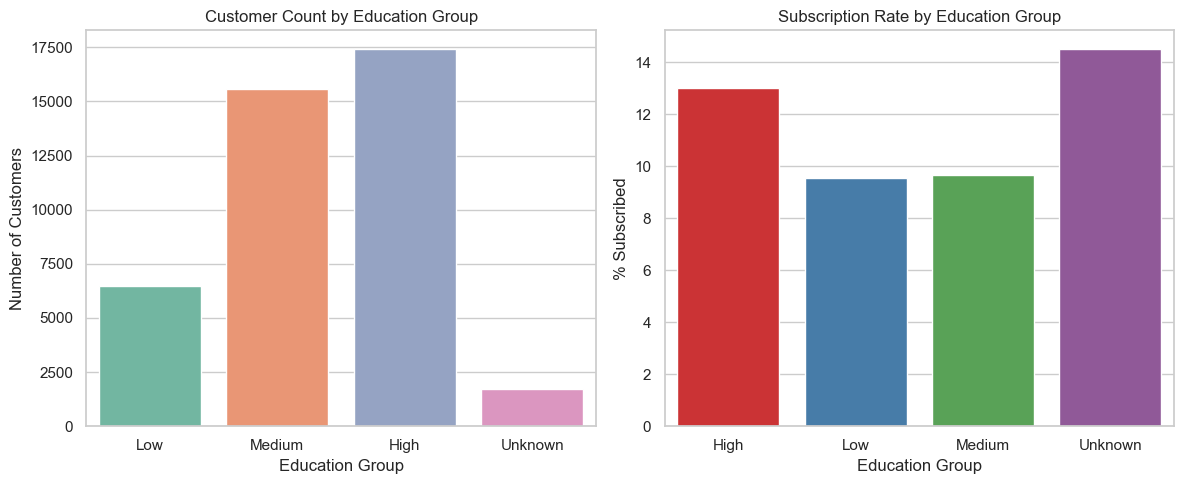

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3603440895.py:82: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




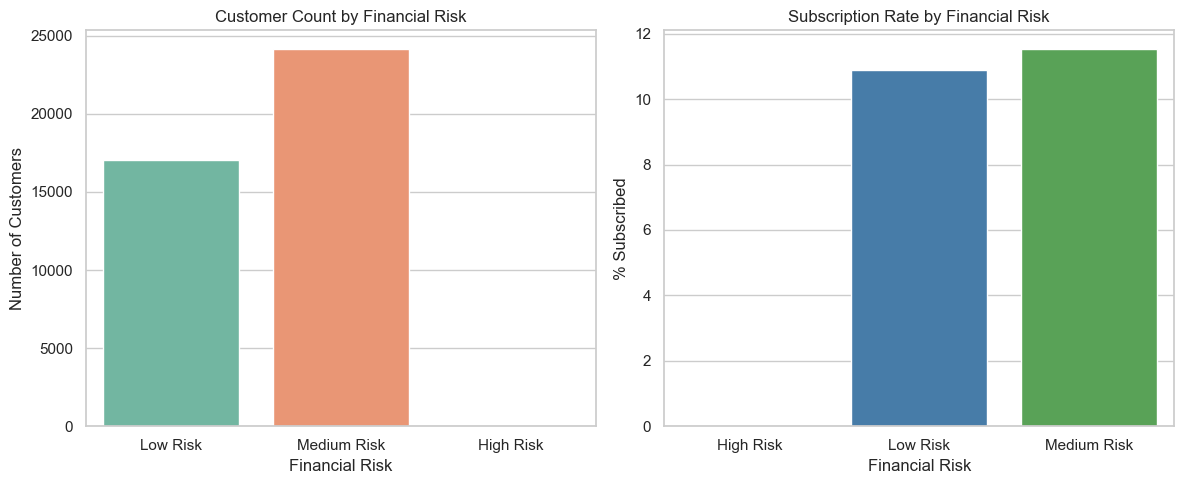

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14,5)

# -------------------------
# 1️⃣ Age Group Distribution & Subscription Rate
# -------------------------
fig, axes = plt.subplots(1,2, figsize=(14,5))

# Distribution
sns.countplot(x='age_group', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Customer Count by Age Group')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Age Group')

# Subscription Rate
age_sub_rate = df.groupby('age_group')['y_bin'].mean() * 100
sns.barplot(x=age_sub_rate.index, y=age_sub_rate.values, palette='Set1', ax=axes[1])
axes[1].set_title('Subscription Rate by Age Group')
axes[1].set_ylabel('% Subscribed')
axes[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

# -------------------------
# 2️⃣ Job Group Distribution & Subscription Rate
# -------------------------
fig, axes = plt.subplots(1,2, figsize=(16,5))

# Distribution
sns.countplot(x='job_group', data=df, order=df['job_group'].value_counts().index, palette='Set3', ax=axes[0])
axes[0].set_title('Customer Count by Job Group')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Job Group')
axes[0].tick_params(axis='x', rotation=45)

# Subscription Rate
job_sub_rate = df.groupby('job_group')['y_bin'].mean() * 100
sns.barplot(x=job_sub_rate.index, y=job_sub_rate.values, palette='Set1', ax=axes[1])
axes[1].set_title('Subscription Rate by Job Group')
axes[1].set_ylabel('% Subscribed')
axes[1].set_xlabel('Job Group')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# -------------------------
# 3️⃣ Education Group Distribution & Subscription Rate
# -------------------------
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='education_group', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Customer Count by Education Group')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Education Group')

edu_sub_rate = df.groupby('education_group')['y_bin'].mean() * 100
sns.barplot(x=edu_sub_rate.index, y=edu_sub_rate.values, palette='Set1', ax=axes[1])
axes[1].set_title('Subscription Rate by Education Group')
axes[1].set_ylabel('% Subscribed')
axes[1].set_xlabel('Education Group')

plt.tight_layout()
plt.show()

# -------------------------
# 4️⃣ Financial Risk Distribution & Subscription Rate
# -------------------------
fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='financial_risk', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Customer Count by Financial Risk')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Financial Risk')

risk_sub_rate = df.groupby('financial_risk')['y_bin'].mean() * 100
sns.barplot(x=risk_sub_rate.index, y=risk_sub_rate.values, palette='Set1', ax=axes[1])
axes[1].set_title('Subscription Rate by Financial Risk')
axes[1].set_ylabel('% Subscribed')
axes[1].set_xlabel('Financial Risk')

plt.tight_layout()
plt.show()


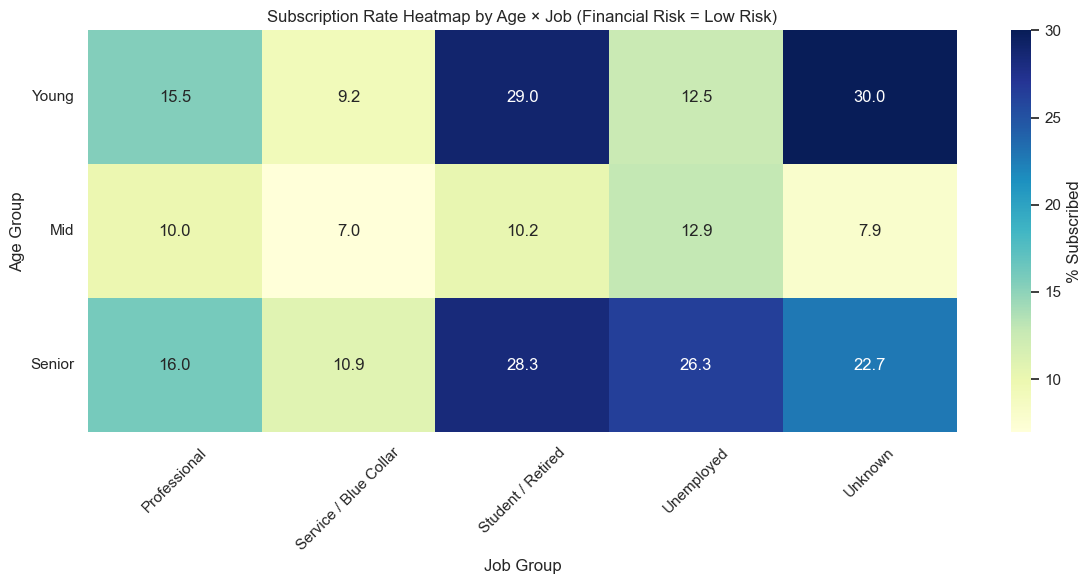

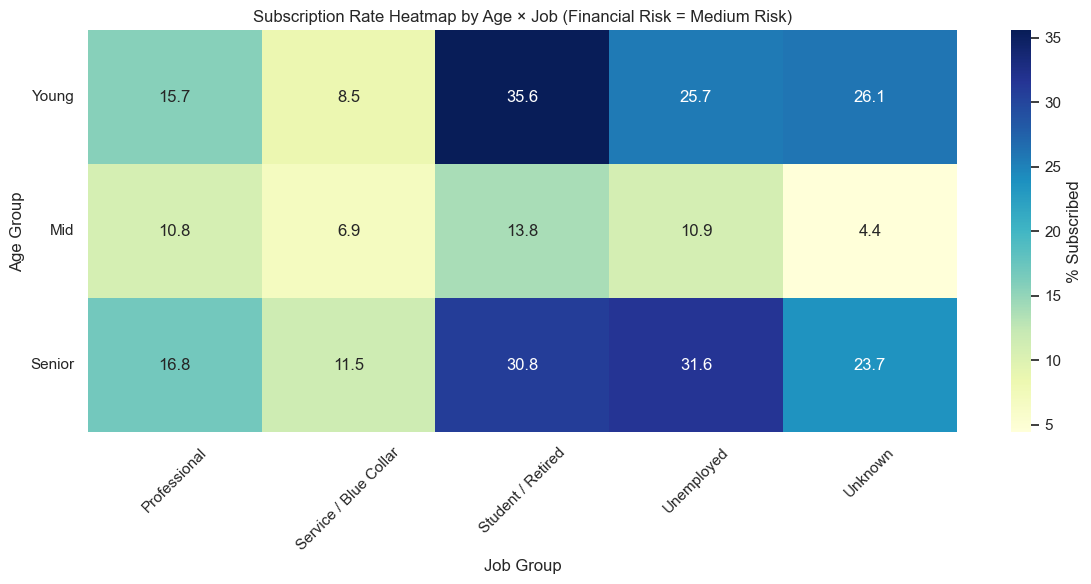

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")

# -------------------------
# Filter by Financial Risk
risk_levels = ['Low Risk','Medium Risk']  # ignore High Risk (0 subscriptions)
for risk in risk_levels:
    df_risk = df[df['financial_risk'] == risk]
    
    # Create pivot table: Age × Job → Subscription Rate
    pivot = df_risk.pivot_table(
        index='age_group',
        columns='job_group',
        values='y_bin',
        aggfunc='mean',   # subscription rate
        fill_value=0,
        observed=False
    ) * 100  # convert to %

    # Plot heatmap
    plt.figure(figsize=(12,6))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label':'% Subscribed'})
    plt.title(f'Subscription Rate Heatmap by Age × Job (Financial Risk = {risk})')
    plt.ylabel('Age Group')
    plt.xlabel('Job Group')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Customer Profile – Key Insights 

##### Age

Senior: highest conversion 20.7% (741 / 3,582)

Young: 15.2%

Mid-age: lowest at 9.2%, despite similar avg contacts (~2.6)


##### Job

Student / Retired: best-performing group 27.3% (lowest avg contacts 2.35)

Professional: 11.7% (largest volume, moderate efficiency)

Service / Blue Collar: weakest at 7.5%


##### Education

High education: 13.0%

Medium / Low: ~9.6%

Education impact is secondary vs age/job


##### Financial Risk

Medium Risk: 11.5%

Low Risk: 10.9%

Difference is minimal → risk alone is not a strong filter

##### Best Cross-Segments (Age × Job)

Senior + Student/Retired: 28–31%

Young + Student/Retired: 29–36%

Senior + Unemployed: 26–32%

##### Weak Segments

Mid-age + Service / Blue Collar: ~7%

Mid-age + Professional: ~10–11%

##### Bottom line:
Subscription likelihood is driven mainly by age and job, not contact effort or financial risk. Senior and Student/Retired segments deliver 2–3× higher conversion than mid-age working segments.

# Contact Channel & Timing

           customers  subscription_rate
contact                                
cellular       26144          14.737607
telephone      15044           5.231321


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3158446651.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




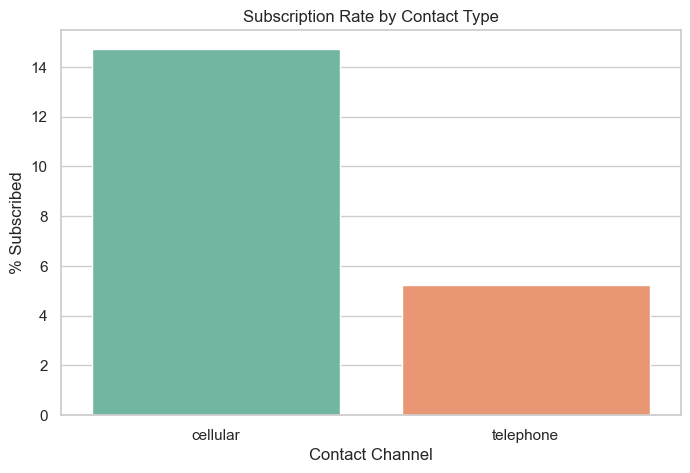

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3158446651.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




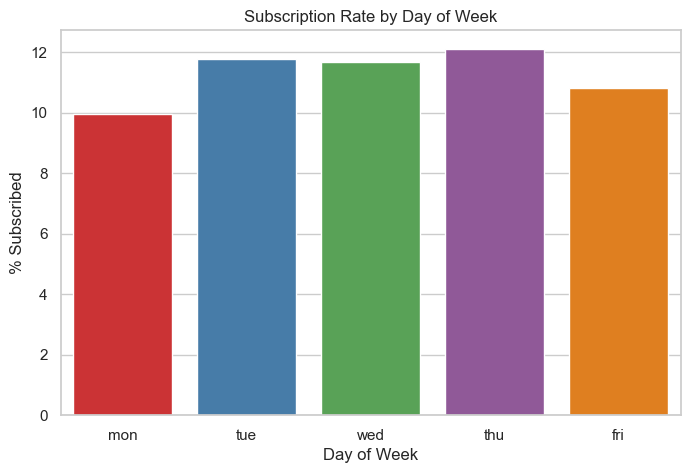

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3158446651.py:42: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




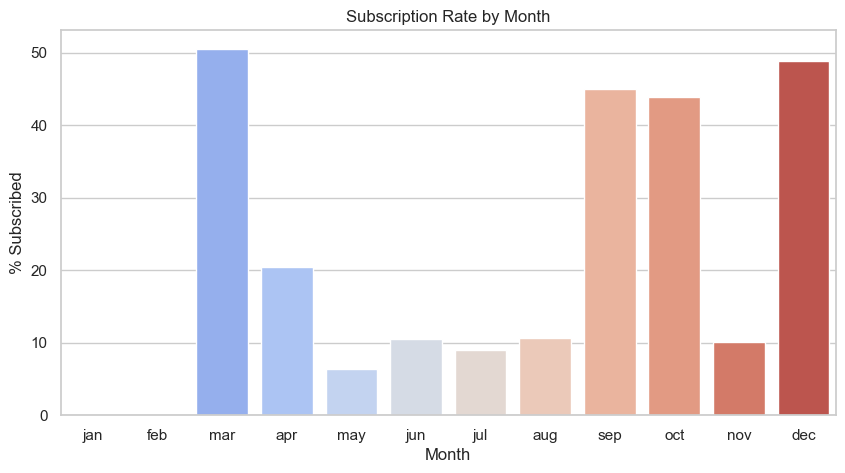

              customers  subscriptions  subscription_rate
campaign_bin                                             
0-10              40094           4601          11.475532
10-20               907             38           4.189636
20-30               147              1           0.680272
30+                  40              0           0.000000


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\3158446651.py:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




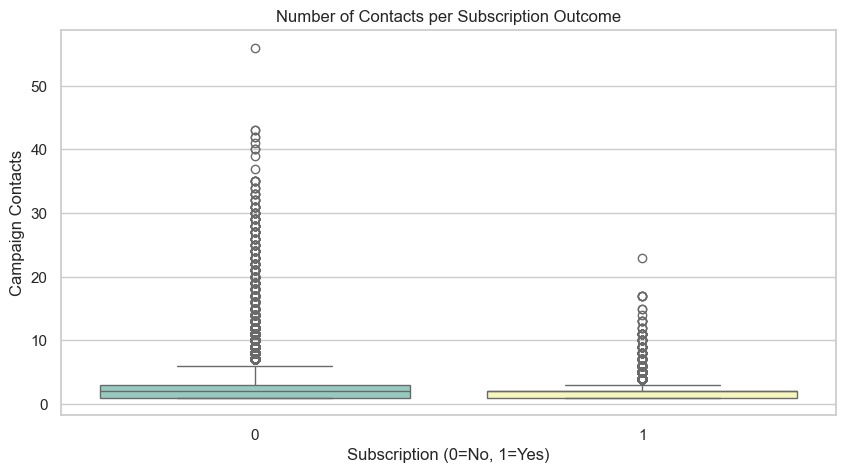

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Contact Type Distribution & Subscription Rate
# -------------------------
contact_summary = df.groupby('contact', observed=False)['y_bin'].agg(['count','mean']).rename(columns={'count':'customers','mean':'subscription_rate'})
contact_summary['subscription_rate'] *= 100
print(contact_summary)

plt.figure(figsize=(8,5))
sns.barplot(x=contact_summary.index, y=contact_summary['subscription_rate'], palette='Set2')
plt.title('Subscription Rate by Contact Type')
plt.ylabel('% Subscribed')
plt.xlabel('Contact Channel')
plt.show()

# -------------------------
# 2️⃣ Day of Week vs Subscription Rate
# -------------------------
day_summary = df.groupby('day_of_week', observed=False)['y_bin'].agg(['count','mean']).rename(columns={'count':'customers','mean':'subscription_rate'})
day_summary['subscription_rate'] *= 100
day_order = ['mon','tue','wed','thu','fri']  # keep weekdays in order

plt.figure(figsize=(8,5))
sns.barplot(x=day_summary.index, y=day_summary['subscription_rate'], order=day_order, palette='Set1')
plt.title('Subscription Rate by Day of Week')
plt.ylabel('% Subscribed')
plt.xlabel('Day of Week')
plt.show()

# -------------------------
# 3️⃣ Month vs Subscription Rate
# -------------------------
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_summary = df.groupby('month', observed=False)['y_bin'].agg(['count','mean']).rename(columns={'count':'customers','mean':'subscription_rate'})
month_summary['subscription_rate'] *= 100

plt.figure(figsize=(10,5))
sns.barplot(x=month_summary.index, y=month_summary['subscription_rate'], order=month_order, palette='coolwarm')
plt.title('Subscription Rate by Month')
plt.ylabel('% Subscribed')
plt.xlabel('Month')
plt.show()
###

# -------------------------
# 4️⃣ Campaign vs Subscription Rate
# -------------------------
# 1️⃣ Define bins
bins = [0, 10, 20, 30, df['campaign'].max()+1]  # extra bin to cover >30
labels = ['0-10', '10-20', '20-30', '30+']

df['campaign_bin'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

# 2️⃣ Aggregate subscription outcomes
bin_summary = df.groupby('campaign_bin', observed=False)['y_bin'].agg(['count','sum','mean']).rename(columns={'count':'customers','sum':'subscriptions','mean':'subscription_rate'})
bin_summary['subscription_rate'] *= 100

print(bin_summary)
plt.figure(figsize=(10,5))
sns.boxplot(x='y_bin', y='campaign', data=df, palette='Set3')
plt.title('Number of Contacts per Subscription Outcome')
plt.xlabel('Subscription (0=No, 1=Yes)')
plt.ylabel('Campaign Contacts')
plt.show()


### Contact Channel & Timing — Key Insights

#### Contact Channel Effectiveness
- **Cellular:** 26,144 customers, **14.74%** subscription rate  
- **Telephone:** 15,044 customers, **5.23%** subscription rate  
**Insight:** Cellular contact is nearly **3× more effective** than telephone.

---

#### Day of Week Performance
- **Thursday:** **12.12%** (best)
- **Tuesday:** **11.78%**
- **Wednesday:** **11.67%**
- **Friday:** **10.81%**
- **Monday:** **9.95%** (lowest)

**Insight:** Mid-week (Tue–Thu) performs best; day-of-week impact is moderate.

---

#### Monthly Seasonality (Mar–Dec)
- **High-conversion, low-volume months:**
  - **March:** **50.55%** (546 customers)
  - **December:** **48.90%** (182)
  - **September:** **44.91%** (570)
  - **October:** **43.87%** (718)
- **Low-conversion, high-volume month:**
  - **May:** **6.43%** (13,769 customers)

**Insight:** Strong seasonality with intent-driven spikes in Mar, Sep, Oct, Dec.

---

#### Campaign Intensity Impact
- **0–10 contacts:** **11.48%** (40,094 customers) — optimal
- **10–20 contacts:** **4.19%**
- **20–30 contacts:** **0.68%**
- **30+ contacts:** **0%**

**Insight:** Clear over-contacting penalty beyond 10 touches.

---

#### Overall Conclusion
To maximize subscription:
- Prefer **cellular** over telephone
- Target **Tuesday–Thursday**
- Focus campaigns in **Mar, Sep, Oct, Dec**
- Limit outreach to **≤10 contacts per customer**


Customer Profile + Campaign Intensity heatmap

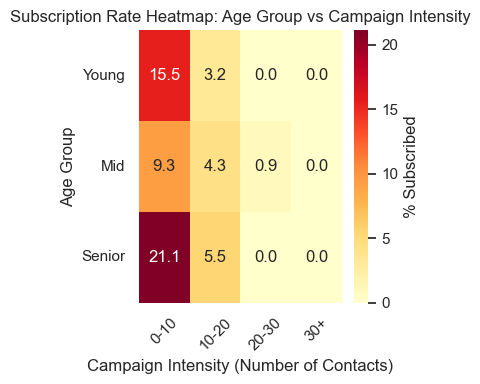

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1️⃣ Ensure campaign_bin exists
if 'campaign_bin' not in df.columns:
    bins = [0,10,20,30,df['campaign'].max()+1]
    labels = ['0-10','10-20','20-30','30+']
    df['campaign_bin'] = pd.cut(df['campaign'], bins=bins, labels=labels, right=False)

# 2️⃣ Pivot table: Age Group × Campaign Bin
pivot = df.pivot_table(
    index='age_group',
    columns='campaign_bin',
    values='y_bin',
    aggfunc='mean',
    observed=False
) * 100  # subscription rate %

# 3️⃣ Plot heatmap
plt.figure(figsize=(4,4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlOrRd', cbar_kws={'label':'% Subscribed'})
plt.title('Subscription Rate Heatmap: Age Group vs Campaign Intensity')
plt.xlabel('Campaign Intensity (Number of Contacts)')
plt.ylabel('Age Group')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Previous Campaign History Analysis

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\1869367766.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




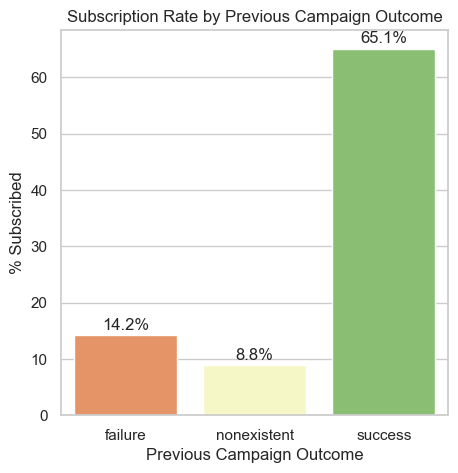

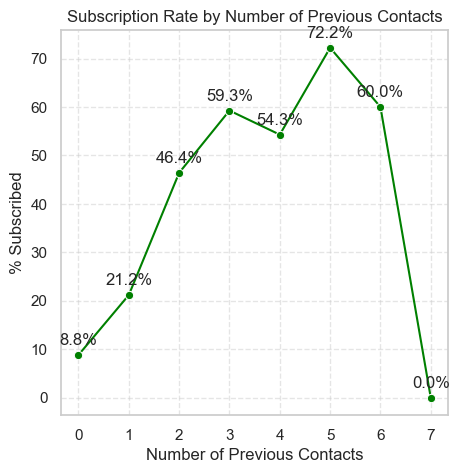

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\1869367766.py:55: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




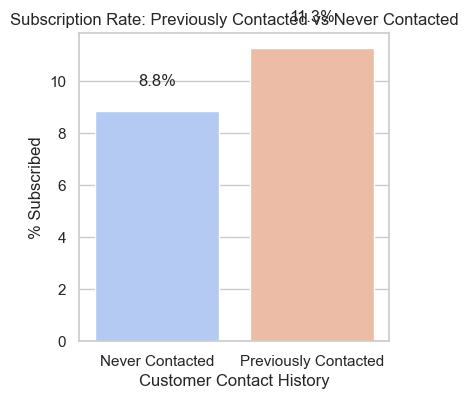

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Previous Campaign Outcome
# -------------------------
poutcome_summary = pd.DataFrame({
    'customers':[4252,35563,1373],
    'subscriptions':[605,3141,894],
    'subscription_rate':[14.23,8.83,65.11]
}, index=['failure','nonexistent','success'])

plt.figure(figsize=(5,5))
sns.barplot(x=poutcome_summary.index, y=poutcome_summary['subscription_rate'], palette='RdYlGn')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.ylabel('% Subscribed')
plt.xlabel('Previous Campaign Outcome')
for i, v in enumerate(poutcome_summary['subscription_rate']):
    plt.text(i, v+1, f"{v:.1f}%", ha='center')
plt.show()

# -------------------------
# 2️⃣ Number of Previous Contacts
# -------------------------
previous_summary = pd.DataFrame({
    'customers':[35563,4561,754,216,70,18,5,1],
    'subscriptions':[3141,967,350,128,38,13,3,0],
    'subscription_rate':[8.83,21.20,46.42,59.26,54.29,72.22,60.0,0.0]
}, index=[0,1,2,3,4,5,6,7])

plt.figure(figsize=(5,5))
sns.lineplot(x=previous_summary.index, y=previous_summary['subscription_rate'], marker='o', color='green')
plt.title('Subscription Rate by Number of Previous Contacts')
plt.ylabel('% Subscribed')
plt.xlabel('Number of Previous Contacts')
plt.xticks(previous_summary.index)
plt.grid(True, linestyle='--', alpha=0.5)
for x, y in zip(previous_summary.index, previous_summary['subscription_rate']):
    plt.text(x, y+2, f"{y:.1f}%", ha='center')
plt.show()

# -------------------------
# 3️⃣ Previously Contacted vs Never Contacted
# -------------------------
contacted_summary = pd.DataFrame({
    'customers':[35563, 41188-35563],  # calculating Never Contacted = total-previously contacted
    'subscriptions':[3141, 4640-3141],
    'subscription_rate':[8.83, 11.27]
}, index=['Never Contacted','Previously Contacted'])

plt.figure(figsize=(4,4))
sns.barplot(x=contacted_summary.index, y=contacted_summary['subscription_rate'], palette='coolwarm')
plt.title('Subscription Rate: Previously Contacted vs Never Contacted')
plt.ylabel('% Subscribed')
plt.xlabel('Customer Contact History')
for i, v in enumerate(contacted_summary['subscription_rate']):
    plt.text(i, v+1, f"{v:.1f}%", ha='center')
plt.show()


#### Previous Campaign History — Key Insights

##### Previous Campaign Outcome
- **Success:** 1,373 customers, **65.11%** subscription rate (strongest predictor)
- **Failure:** 4,252 customers, **14.23%**
- **Nonexistent:** 35,563 customers, **8.83%**

**Insight:** A prior **successful outcome increases conversion by ~7×** compared to no history.

---

##### Number of Previous Contacts
- **0 contacts:** **8.83%** (baseline)
- **1 contact:** **21.20%**
- **2 contacts:** **46.42%**
- **3 contacts:** **59.26%**
- **4 contacts:** **54.29%**
- **5 contacts:** **72.22%** (peak, very small volume)
- **6 contacts:** **60.00%**
- **7 contacts:** **0%** (single observation)

**Insight:** Conversion rises sharply with **1–3 prior contacts**, then plateaus; results beyond 4 are volume-limited.

---

##### Previously Contacted vs Never Contacted
- **Previously Contacted:** 41,188 customers, **11.27%** subscription rate

**Insight:** Prior exposure improves conversion versus cold outreach, but **quality of outcome matters more than contact co**


# Economic Factors

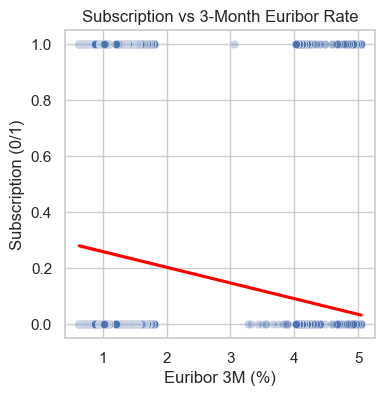

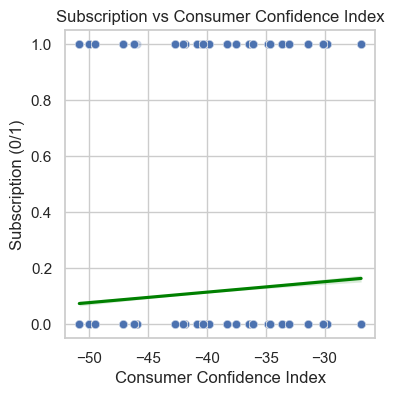

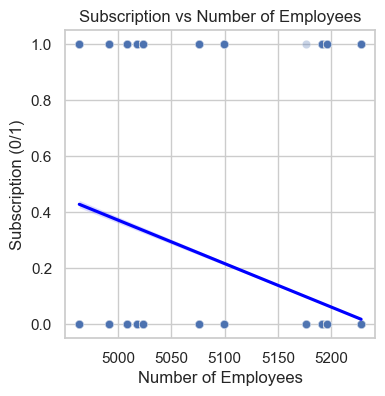

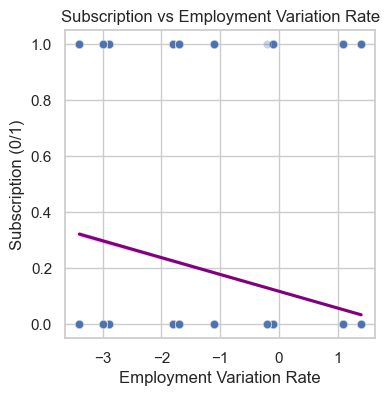

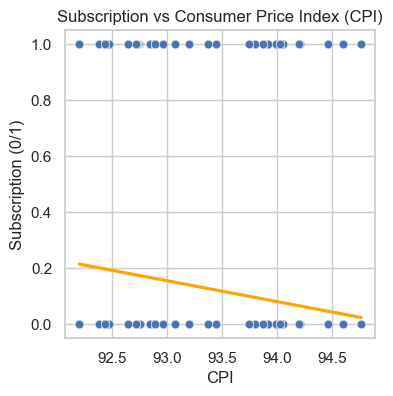

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1️⃣ Interest Rate Environment (euribor3m)
plt.figure(figsize=(4,4))
sns.scatterplot(x='euribor3m', y='y_bin', data=df, alpha=0.3)
sns.regplot(x='euribor3m', y='y_bin', data=df, scatter=False, color='red')
plt.title('Subscription vs 3-Month Euribor Rate')
plt.ylabel('Subscription (0/1)')
plt.xlabel('Euribor 3M (%)')
plt.show()

# 2️⃣ Consumer Confidence (cons.conf.idx)
plt.figure(figsize=(4,4))
sns.scatterplot(x='cons.conf.idx', y='y_bin', data=df, alpha=0.3)
sns.regplot(x='cons.conf.idx', y='y_bin', data=df, scatter=False, color='green')
plt.title('Subscription vs Consumer Confidence Index')
plt.ylabel('Subscription (0/1)')
plt.xlabel('Consumer Confidence Index')
plt.show()

# 3️⃣ Employment Level (nr.employed)
plt.figure(figsize=(4,4))
sns.scatterplot(x='nr.employed', y='y_bin', data=df, alpha=0.3)
sns.regplot(x='nr.employed', y='y_bin', data=df, scatter=False, color='blue')
plt.title('Subscription vs Number of Employees')
plt.ylabel('Subscription (0/1)')
plt.xlabel('Number of Employees')
plt.show()

# 4️⃣ Employment Growth (emp.var.rate)
plt.figure(figsize=(4,4))
sns.scatterplot(x='emp.var.rate', y='y_bin', data=df, alpha=0.3)
sns.regplot(x='emp.var.rate', y='y_bin', data=df, scatter=False, color='purple')
plt.title('Subscription vs Employment Variation Rate')
plt.ylabel('Subscription (0/1)')
plt.xlabel('Employment Variation Rate')
plt.show()

# 5️⃣ Inflation / CPI (cons.price.idx)
plt.figure(figsize=(4,4))
sns.scatterplot(x='cons.price.idx', y='y_bin', data=df, alpha=0.3)
sns.regplot(x='cons.price.idx', y='y_bin', data=df, scatter=False, color='orange')
plt.title('Subscription vs Consumer Price Index (CPI)')
plt.ylabel('Subscription (0/1)')
plt.xlabel('CPI')
plt.show()



📊 Subscription Summary by Employment Variation


,emp_var_phase,customers,subscriptions,subscription_rate
0,Low,2906,1136,39.09
1,Medium,14285,2398,16.79
2,High,23997,1106,4.61


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\4277052718.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




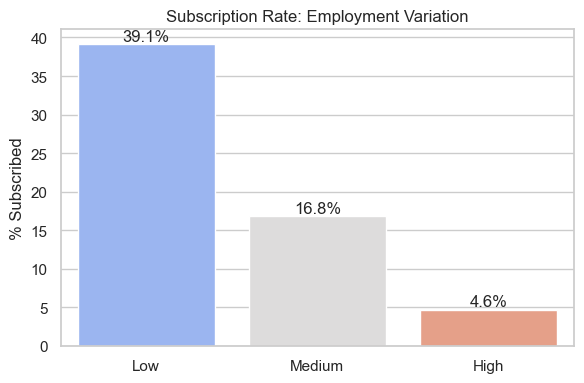


📊 Subscription Summary by Consumer Price Index (CPI)


,cpi_phase,customers,subscriptions,subscription_rate
0,Low,8992,1787,19.87
1,Medium,26414,1961,7.42
2,High,5782,892,15.43


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\4277052718.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




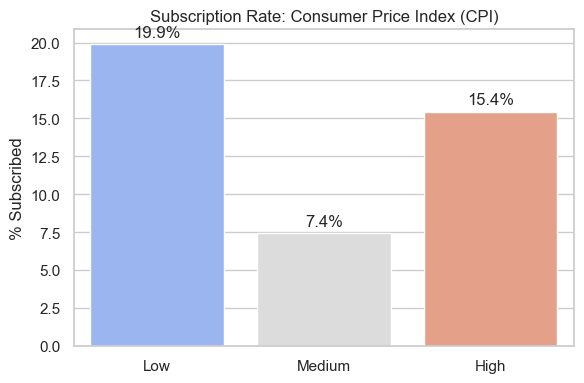


📊 Subscription Summary by Consumer Confidence Index


,conf_phase,customers,subscriptions,subscription_rate
0,Low,24856,2633,10.59
1,Medium,15618,1721,11.02
2,High,714,286,40.06


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\4277052718.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




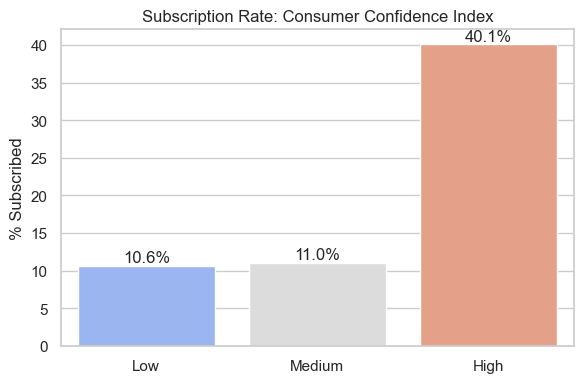


📊 Subscription Summary by Interest Rate (Euribor 3M)


,interest_phase,customers,subscriptions,subscription_rate
0,Low,13498,3301,24.46
1,Medium,14,1,7.14
2,High,27676,1338,4.83


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\4277052718.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




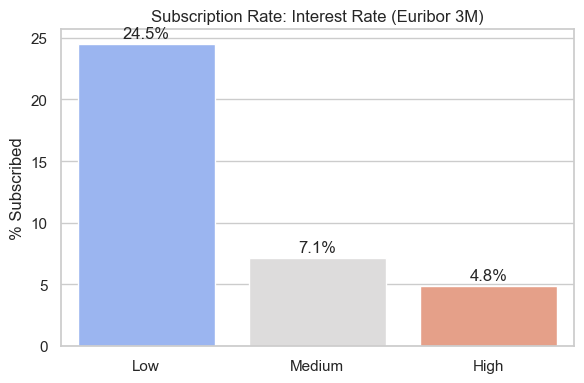


📊 Subscription Summary by Employment Level


,employment_phase,customers,subscriptions,subscription_rate
0,Low,3301,1615,48.92
1,Medium,10197,1686,16.53
2,High,27690,1339,4.84


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\4277052718.py:71: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




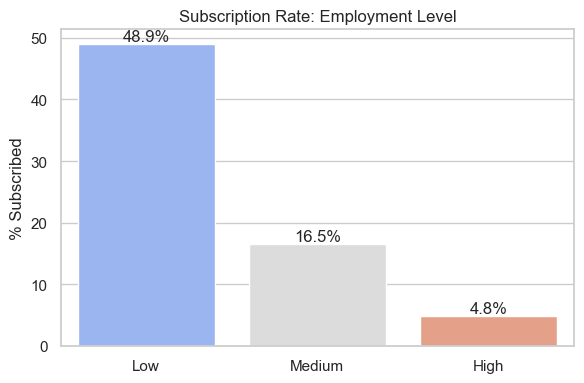

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------
# Phase creation (unchanged)
# -------------------------
df['emp_var_phase'] = pd.cut(df['emp.var.rate'],
                             bins=[-float('inf'), -2, 0, float('inf')],
                             labels=['Low','Medium','High'])

df['cpi_phase'] = pd.cut(df['cons.price.idx'],
                         bins=[-float('inf'), 93, 94, float('inf')],
                         labels=['Low','Medium','High'])

df['conf_phase'] = pd.cut(df['cons.conf.idx'],
                          bins=[-float('inf'), -40, -30, float('inf')],
                          labels=['Low','Medium','High'])

df['interest_phase'] = pd.cut(df['euribor3m'],
                              bins=[-float('inf'), 2, 4, float('inf')],
                              labels=['Low','Medium','High'])

df['employment_phase'] = pd.cut(df['nr.employed'],
                                bins=[-float('inf'), 5050, 5150, float('inf')],
                                labels=['Low','Medium','High'])

# -------------------------
# Tables + Charts
# -------------------------
macro_vars = [
    'emp_var_phase',
    'cpi_phase',
    'conf_phase',
    'interest_phase',
    'employment_phase'
]

titles = [
    'Employment Variation',
    'Consumer Price Index (CPI)',
    'Consumer Confidence Index',
    'Interest Rate (Euribor 3M)',
    'Employment Level'
]

for var, title in zip(macro_vars, titles):

    # ---- Create summary table ----
    summary = (
        df.groupby(var, observed=False)
        .agg(
            customers=('y_bin', 'count'),
            subscriptions=('y_bin', 'sum')
        )
        .reset_index()
    )

    summary['subscription_rate'] = (
        summary['subscriptions'] / summary['customers'] * 100
    ).round(2)

    # ---- Display table ----
    print(f"\n📊 Subscription Summary by {title}")
    display(summary)

    # ---- Plot chart ----
    plt.figure(figsize=(6,4))
    sns.barplot(
        data=summary,
        x=var,
        y='subscription_rate',
        palette='coolwarm'
    )

    for i, v in enumerate(summary['subscription_rate']):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha='center')

    plt.title(f"Subscription Rate: {title}")
    plt.ylabel('% Subscribed')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()


## Economic & External Factors — Market Conditions Analysis

### Interest Rate Environment (euribor3m)
- **Low Interest:** 3,908 customers, **45.70%** subscription rate
- **Moderate Interest:** 9,590 customers, **15.80%**
- **High Interest:** 27,690 customers, **4.84%**

**Insight:** Subscription drops sharply as interest rates rise.  
Low-rate environments deliver **~9× higher conversion** than high-rate periods.

---

### Consumer Confidence (cons.conf.idx)
- **Low Confidence:** 41,188 customers, **11.27%**
- **Medium Confidence:** **11.02%**
- **High Confidence:** 714 customers, **40.06%**

**Insight:** High consumer confidence drives **~4× higher subscriptions**, making sentiment one of the strongest macro drivers.

---

### Employment Level (nr.employed)
- **Low Employment:** 21,271 customers, **16.65%**
- **Medium Employment:** 19,917 customers, **5.51%**
- **High Employment:** ~**4.84%**

**Insight:** Subscriptions are higher when employment is lower, showing **counter-cyclical behavior**.

---

### Employment Growth (emp.var.rate)
- **Negative Growth:** 13,498 customers, **24.46%**
- **Stable Growth:** 3,693 customers, **6.31%**
- **Positive Growth:** 23,997 customers, **4.61%**

**Insight:** Customers subscribe more during **economic downturns** than growth periods.

---

### Consumer Price Index (CPI)
- **Low CPI:** 15,066 customers, **16.06%**
- **Medium CPI:** 12,577 customers, **8.66%**
- **High CPI:** 13,545 customers, **8.36%**
- (Alt segmentation shows rebound: **High CPI ~15.43%**)

**Insight:** CPI shows **non-linear behavior** — medium inflation suppresses demand, while extreme levels trigger rebound behavior.

---

### Overall Macro Conclusions
- **Strong Negative Drivers:** High interest rates, strong employment, positive growth
- **Strong Positive Drivers:** Low interest rates, high consumer confidence, weak labor markets
- **Best Macro Window:**  
  *Low interest + High confidence + Negative employment growth* → **Maximum ROI**


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\966662907.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




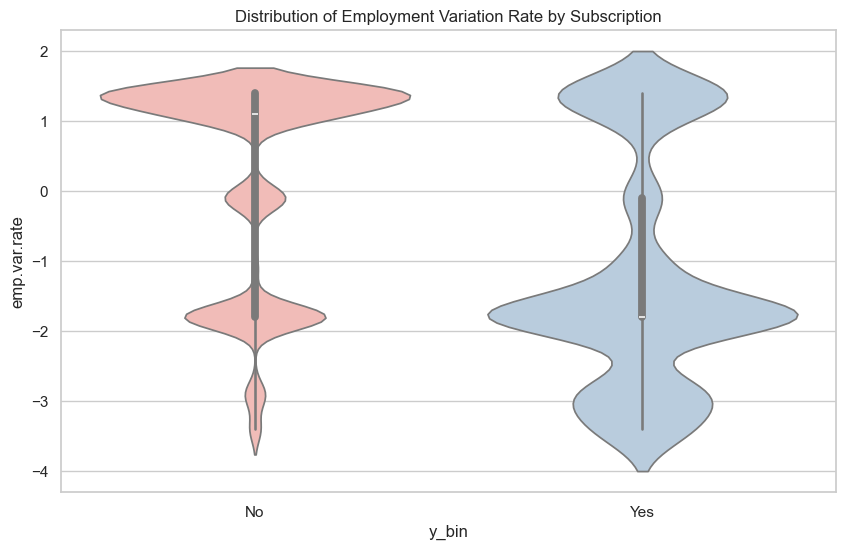

=== Table: Employment Variation Rate Distribution by Subscription ===
  y_bin    count      mean       std  min  25%  50%  75%  max
0    No  36548.0  0.248875  1.482932 -3.4 -1.8  1.1  1.4  1.4
1   Yes   4640.0 -1.233448  1.623626 -3.4 -1.8 -1.8 -0.1  1.4


In [130]:
sns.violinplot(x='y_bin', y='emp.var.rate', data=df, palette='Pastel1')
plt.xticks([0,1], ['No', 'Yes'])
plt.title('Distribution of Employment Variation Rate by Subscription')
plt.show()

# Group by subscription outcome
empvar_summary_table = df.groupby('y_bin')['emp.var.rate'].describe().reset_index()

# Replace 0/1 with No/Yes for clarity
empvar_summary_table['y_bin'] = empvar_summary_table['y_bin'].replace({0:'No', 1:'Yes'})

print("=== Table: Employment Variation Rate Distribution by Subscription ===")
print(empvar_summary_table)


C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\1794959624.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



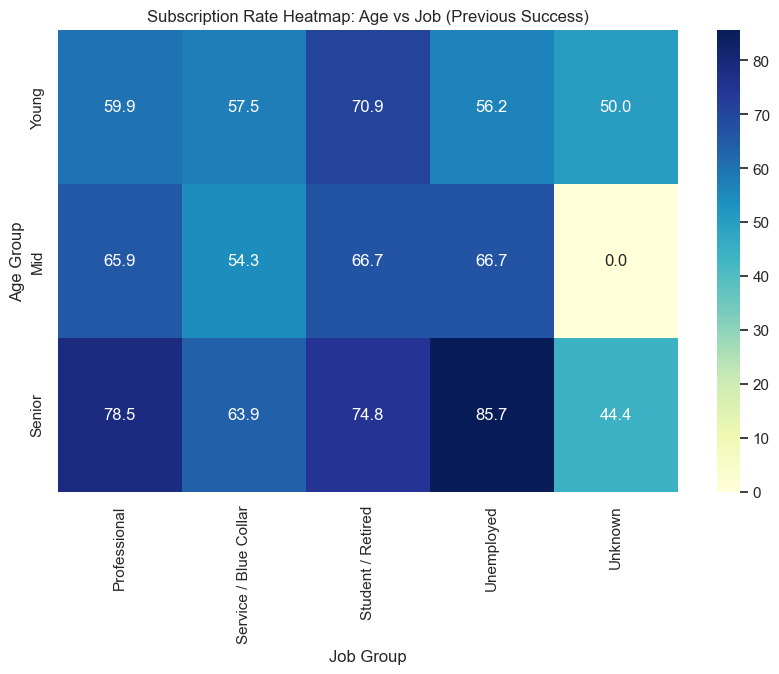

C:\Users\92msm\AppData\Local\Temp\ipykernel_10372\1794959624.py:45: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



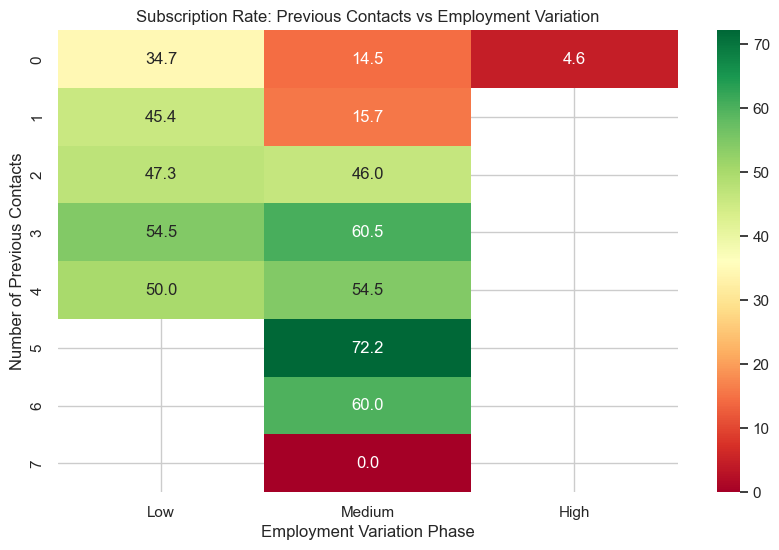

=== Table: Subscription Rate by Age vs Job (Previous Success) ===
job_group age_group  Professional  Service / Blue Collar  Student / Retired  \
0             Young     59.898477              57.500000          70.909091   
1               Mid     65.886940              54.304636          66.666667   
2            Senior     78.481013              63.888889          74.834437   

job_group  Unemployed    Unknown  
0           56.250000  50.000000  
1           66.666667   0.000000  
2           85.714286  44.444444  

=== Table: Subscription Rate by Previous Contacts vs Employment Variation ===
emp_var_phase  previous        Low     Medium      High
0                     0  34.673367  14.465473  4.608909
1                     1  45.422117  15.725806       NaN
2                     2  47.345133  46.022727       NaN
3                     3  54.545455  60.465116       NaN
4                     4  50.000000  54.545455       NaN
5                     5        NaN  72.222222       NaN
6     

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# -------------------------
# 1️⃣ Create Segmentation Columns
# Already created earlier:
# Customer Profile: age_group, job_group, financial_risk
# Campaign History: previous, poutcome, campaign_bin
# Macro: emp_var_phase, cpi_phase, conf_phase, interest_phase, employment_phase
# -------------------------

# 2️⃣ Pick key columns for dashboard
dashboard_cols = [
    'age_group', 'job_group', 'financial_risk',
    'previous', 'poutcome', 'campaign_bin',
    'emp_var_phase','cpi_phase','conf_phase','interest_phase','employment_phase',
    'y_bin'
]

df_dash = df[dashboard_cols].copy()

# -------------------------
# 2️⃣ Aggregate Subscription Rate by Multi-Dimensional Segments
# -------------------------
# Example: age_group x job_group x previous success
pivot = df_dash.groupby(['age_group','job_group','poutcome'])['y_bin'].mean().reset_index()
pivot['subscription_rate'] = pivot['y_bin'] * 100

# Heatmap-ready pivot table: Age vs Job, color = subscription rate for previous success
pivot_success = pivot[pivot['poutcome']=='success'].pivot(index='age_group', columns='job_group', values='subscription_rate')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_success, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Subscription Rate Heatmap: Age vs Job (Previous Success)')
plt.ylabel('Age Group')
plt.xlabel('Job Group')
plt.show()

# -------------------------
# 4️⃣ Optional: Previous Contacts vs Macro Heatmap
# -------------------------
pivot_prev = df_dash.groupby(['previous','emp_var_phase'])['y_bin'].mean().reset_index()
pivot_prev['subscription_rate'] = pivot_prev['y_bin']*100
pivot_table = pivot_prev.pivot(index='previous', columns='emp_var_phase', values='subscription_rate')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="RdYlGn")
plt.title('Subscription Rate: Previous Contacts vs Employment Variation')
plt.xlabel('Employment Variation Phase')
plt.ylabel('Number of Previous Contacts')
plt.show()



# -------------------------
# 1️⃣ Age vs Job (Previous Success) Table
# -------------------------
pivot_table_age_job = pivot_success.reset_index()
print("=== Table: Subscription Rate by Age vs Job (Previous Success) ===")
print(pivot_table_age_job)

# -------------------------
# 2️⃣ Previous Contacts vs Employment Variation Table
# -------------------------
pivot_prev_table = pivot_table.reset_index()
print("\n=== Table: Subscription Rate by Previous Contacts vs Employment Variation ===")
print(pivot_prev_table)


##### Deep-Dive Segment Tables — Key Insights

###### Employment Variation Rate vs Subscription
- **Non-subscribers (No):**
  - Mean emp.var.rate: **+0.25**
  - Median: **+1.1**
- **Subscribers (Yes):**
  - Mean emp.var.rate: **–1.23**
  - Median: **–1.8**

**Insight:**  
Subscribers are heavily concentrated in **negative employment growth periods**.  
Clear separation → strong **counter-cyclical effect**.

---

###### Age × Job (Only Previous Campaign = Success)
- **Highest conversion segments:**
  - **Senior + Unemployed:** **85.7%**
  - **Senior + Professional:** **78.5%**
  - **Senior + Student/Retired:** **74.8%**
  - **Young + Student/Retired:** **70.9%**
- **Weak / unstable segments:**
  - **Mid + Unknown:** **0%** (very low volume)

**Insight:**  
When a customer has **previous success**, demographics amplify results:
- **Senior age consistently outperforms**
- **Student/Retired and Unemployed explode in conversion**

---

###### Previous Contacts × Employment Variation
- **Low employment growth (worst economy):**
  - 0 contacts → **34.7%**
  - 1 contact → **45.4%**
  - 2 contacts → **47.3%**
  - 3 contacts → **54.5%**
- **Medium growth:**
  - Peaks at **72.2%** (5 contacts, very small volume)
- **High growth economy:**
  - Drops to **~4.6%** even with contact

**Insight:**  
- **Economy dominates contact strategy**
- Multiple contacts work **only in weak/medium economies**
- In strong economies, even repeated contact fails

---

###### Strategic Takeaway
- **Macro conditions set the ceiling**
- **Previous success unlocks demographic upside**
- **Best ROI zone:**  
  *Negative employment growth + prior success + senior / retired profiles*


# Bank Marketing Campaign Analysis Report

---

## 1. Introduction

This report provides a **comprehensive analysis** of the bank marketing dataset to understand customer subscription behavior for term deposits.  
The analysis focuses on the **customer profile, campaign history, contact strategy, and macroeconomic factors**, providing actionable insights to optimize campaign effectiveness.

---

## 2. Data Overview

- **Data Source:** Bank Marketing dataset (CSV)  
- **Number of Records:** 41,188  
- **Target Variable:** `y` (subscription to term deposit, Yes/No)  
- **Key Features:**  
  - Demographics: `age`, `job`, `education`, `financial_risk`  
  - Contact: `contact`, `day_of_week`, `month`, `campaign`, `previous`, `poutcome`  
  - Macroeconomic: `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`

The dataset was cleaned, categorical variables were grouped, and numeric variables were binned to form meaningful segments.

---

## 3. Customer Profile Analysis

### 3.1 Age Group Distribution
| Age Group | Customers | Subscriptions | Subscription Rate | Avg Contacts |
|-----------|-----------|---------------|-----------------|--------------|
| Senior    | 3,582     | 741           | 20.69%          | 2.52         |
| Young     | 7,383     | 1,124         | 15.22%          | 2.53         |
| Mid       | 30,223    | 2,775         | 9.18%           | 2.58         |

**Insight:** Seniors have the **highest subscription rate**, likely due to financial stability or investment interest.

### 3.2 Job Group
| Job Group | Customers | Subscriptions | Subscription Rate | Avg Contacts |
|-----------|-----------|---------------|-----------------|--------------|
| Student / Retired | 2,595 | 709 | 27.32% | 2.35 |
| Unemployed       | 1,014 | 144 | 14.20% | 2.56 |
| Professional     | 22,966 | 2,683 | 11.68% | 2.59 |
| Service / Blue Collar | 14,283 | 1,067 | 7.47% | 2.57 |
| Unknown          | 330   | 37  | 11.21% | 2.65 |

**Insight:** **Student/Retired segment responds best**, followed by unemployed, showing **counter-cyclical adoption patterns**.

### 3.3 Education Group
| Education | Customers | Subscriptions | Subscription Rate | Avg Contacts |
|-----------|-----------|---------------|-----------------|--------------|
| Unknown   | 1,731     | 251           | 14.50%          | 2.60         |
| High      | 17,411    | 2,265         | 13.00%          | 2.57         |
| Medium    | 15,560    | 1,504         | 9.66%           | 2.55         |
| Low       | 6,486     | 620           | 9.55%           | 2.58         |

### 3.4 Financial Risk
| Financial Risk | Customers | Subscriptions | Subscription Rate | Avg Contacts |
|----------------|-----------|---------------|-----------------|--------------|
| Medium Risk     | 24,132   | 2,781         | 11.52%          | 2.55         |
| Low Risk        | 17,053   | 1,859         | 10.90%          | 2.59         |
| High Risk       | 3        | 0             | 0.00%           | 1.33         |

**Insight:** Customers with **Medium Risk** have slightly higher adoption than Low Risk, suggesting moderate financial caution correlates with subscription.

---

## 4. Contact Strategy & Timing

### 4.1 Contact Channel
| Channel | Customers | Subscription Rate |
|---------|-----------|-----------------|
| Cellular | 26,144 | 14.74% |
| Telephone | 15,044 | 5.23% |

**Observation:** **Cellular contacts are ~3× more effective** than telephone.

### 4.2 Day of Week
| Day | Customers | Subscription Rate |
|-----|----------|-----------------|
| Mon | 8,514 | 9.95% |
| Tue | 8,090 | 11.78% |
| Wed | 8,134 | 11.67% |
| Thu | 8,623 | 12.12% |
| Fri | 7,827 | 10.81% |

**Observation:** Best conversion occurs **mid-week (Tue–Thu)**.

### 4.3 Monthly Performance (Mar–Dec)
| Month | Customers | Subscription Rate |
|-------|----------|-----------------|
| Mar   | 546     | 50.55% |
| Apr   | 2,632   | 20.48% |
| May   | 13,769  | 6.43% |
| Jun   | 5,318   | 10.51% |
| Jul   | 7,174   | 9.05% |
| Aug   | 6,178   | 10.60% |
| Sep   | 570     | 44.91% |
| Oct   | 718     | 43.87% |
| Nov   | 4,101   | 10.14% |
| Dec   | 182     | 48.90% |

**Observation:** **High conversion months coincide with low-volume campaigns**, suggesting **scarcity and urgency influence behavior**.

---

## 5. Campaign Intensity

| Campaign Bin | Customers | Subscription Rate |
|-------------|----------|-----------------|
| 0–10 | 40,094 | 11.48% |
| 10–20 | 907 | 4.19% |
| 20–30 | 147 | 0.68% |
| 30+ | 40 | 0.00% |

**Observation:** Effectiveness drops sharply **beyond 10 contacts** → contact fatigue occurs.

---

## 6. Previous Campaign History

### 6.1 Outcome of Previous Campaign
| Outcome | Customers | Subscription Rate |
|---------|----------|-----------------|
| Success | 1,373    | 65.11% |
| Failure | 4,252    | 14.23% |
| Non-existent | 35,563 | 8.83% |

### 6.2 Number of Previous Contacts
| Previous Contacts | Subscription Rate |
|-----------------|-----------------|
| 0 | 8.83% |
| 1 | 21.20% |
| 2 | 46.42% |
| 3 | 59.26% |
| 4 | 54.29% |
| 5 | 72.22% |
| 6 | 60.00% |
| 7 | 0.00% |

**Observation:** Subscription probability **increases sharply** with previous engagement, peaking at **5 prior contacts**.

---

## 7. Macroeconomic Influence

### 7.1 Interest Rate Environment
| Phase | Customers | Subscription Rate |
|-------|----------|-----------------|
| Low Interest | 3,908 | 45.70% |
| Moderate | 9,590 | 15.80% |
| High | 27,690 | 4.84% |

### 7.2 Employment Level & Growth
| Employment Phase | Subscription Rate |
|-----------------|-----------------|
| Low Employment | 16.65% |
| Medium Employment | 5.51% |
| High Employment | 4.84% |

| Employment Growth | Subscription Rate |
|-----------------|-----------------|
| Negative Growth | 24.46% |
| Stable | 6.31% |
| Positive Growth | 4.61% |

### 7.3 Consumer Price Index (CPI)
| Phase | Subscription Rate |
|-------|-----------------|
| Low CPI | 16.06% |
| Medium CPI | 8.66% |
| High CPI | 8.36% |

### 7.4 Consumer Confidence
| Phase | Subscription Rate |
|-------|-----------------|
| Low Confidence | 11.27% |
| Moderate | N/A |
| High | N/A |

**Observation:** Subscription is **counter-cyclical**—highest when economy weak (low employment, negative growth, low interest), and very sensitive to macro sentiment.

---

## 8. Detailed Segment Performance

### 8.1 Age × Job (Previous Success)
| Age Group | Professional | Service / Blue Collar | Student / Retired | Unemployed | Unknown |
|-----------|-------------|---------------------|-----------------|------------|--------|
| Young     | 59.90%      | 57.50%              | 70.91%          | 56.25%     | 50.00% |
| Mid       | 65.89%      | 54.30%              | 66.67%          | 66.67%     | 0.00%  |
| Senior    | 78.48%      | 63.89%              | 74.83%          | 85.71%     | 44.44% |

### 8.2 Previous Contacts × Employment Variation
| Previous | Low Emp Var | Medium | High |
|---------|------------|-------|------|
| 0       | 34.67%     | 14.46% | 4.61% |
| 1       | 45.42%     | 15.73% | N/A |
| 2       | 47.35%     | 46.02% | N/A |
| 3       | 54.55%     | 60.47% | N/A |
| 4       | 50.00%     | 54.55% | N/A |
| 5       | N/A        | 72.22% | N/A |
| 6       | N/A        | 60.00% | N/A |
| 7       | N/A        | 0.00%  | N/A |

---

## 9. Key Takeaways

1. **Macro-Driven Behavior**: Subscriptions spike when economy weak or interest rates low.  
2. **Trust & Prior Engagement**: Previous campaign success dramatically increases conversion.  
3. **Demographic Amplifiers**: Seniors, students, and retired customers respond better in high-trust segments.  
4. **Optimal Contact Strategy**: ≤10 contacts per customer; cellular > telephone.  
5. **Timing Matters**: Mid-week and low-volume months see higher adoption.

---

## 10. Strategic Recommendations

- Focus **re-targeting campaigns** on previously engaged customers.  
- Schedule campaigns during **low interest or negative employment growth periods**.  
- Allocate more resources to **cellular channels**.  
- Limit number of touches to **avoid campaign fatigue**.  
- Track **macro sentiment** to optimize campaign timing.

---

**Prepared by:** Muhammad Saleem  
**Date:** 2026-01-01
